In [133]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/Salary_Data.csv")
df = pd.DataFrame(data=features)

NameError: name 'features' is not defined

In [135]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [137]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


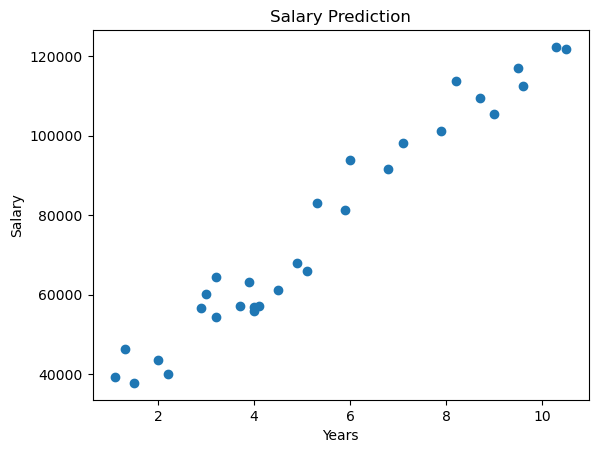

In [138]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [139]:
y=data.Salary.values
x=data.drop('Salary',axis=1)

In [140]:
X = data['Salary']
X.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [141]:
y=data['YearsExperience']
y.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [142]:
X = X.to_numpy()
y = y.to_numpy()

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
X_train = X_train.reshape(-1, 1)
X_test =  X_test.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
Ir = LinearRegression()
Ir.fit(X_train,y_train)

LinearRegression()

In [144]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [145]:
y_pred = lr.predict(X_test)
y_pred

array([3.53932843e+08, 1.14801913e+09, 5.35430241e+08, 5.92993525e+08,
       1.09716234e+09, 1.02645809e+09, 1.05651068e+09, 5.23358554e+08])

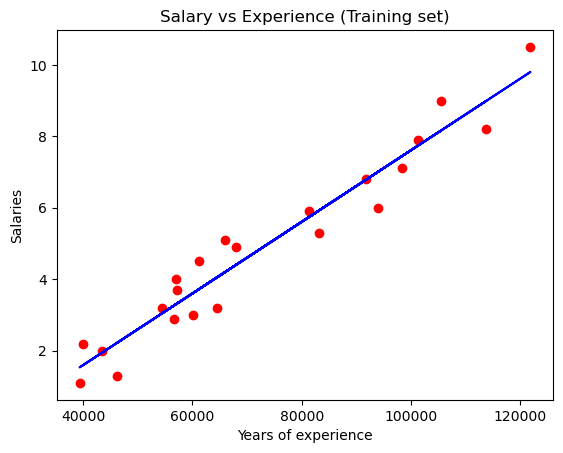

In [146]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, Ir.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

In [147]:
Ir.score(X_test, y_test)

0.974376290571024

In [148]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
y_prediction = Ir.predict(X_test)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

0.40854484439547784


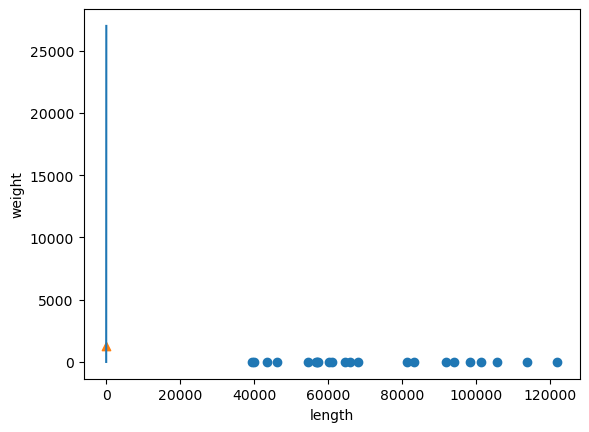

In [149]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([0, 30], [Ir.coef_+Ir.intercept_, 50*Ir.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [150]:
from sklearn.preprocessing import StandardScaler

# features
X = data.drop('Salary', axis = 1)

# target
y = data['YearsExperience']

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [151]:
# 회귀 알고리즘들 적용하기
from sklearn.tree import DecisionTreeRegressor #의사결정나무 회귀 알고리즘
from sklearn.ensemble import RandomForestRegressor #랜럼포레스트 회귀 알고리즘
from sklearn.metrics import mean_absolute_error 

# 알고리즘 정의
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()

# 리스트 준비
models = [dec, ran]
result = []

# 연속적으로 모델을 학습 시키고 평가
for mod in models:
    mod.fit(X_train, y_train)
    val_pred = mod.predict(X_test)
    mae = mean_absolute_error(y_test, val_pred)
    result.append(mae)

print(result)

[0.24999999999999992, 0.16299999999999967]
